<a href="https://colab.research.google.com/github/SDashev/Springboard-Capstone-1/blob/master/insta_cart_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We visualize data from the cleaned dataset.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving combined_data00.zip to combined_data00.zip
User uploaded file "combined_data00.zip" with length 522127334 bytes


In [3]:
!unzip combined_data00.zip
!ls


Archive:  combined_data00.zip
  inflating: combined_data00.csv     
  inflating: combined_data01.csv     
  inflating: combined_data02.csv     
  inflating: combined_data03.csv     
  inflating: combined_data04.csv     
  inflating: combined_data05.csv     
  inflating: combined_data06.csv     
  inflating: combined_data07.csv     
  inflating: combined_data08.csv     
  inflating: combined_data09.csv     
  inflating: combined_data10.csv     
  inflating: combined_data11.csv     
  inflating: combined_data12.csv     
  inflating: combined_data13.csv     
  inflating: combined_data14.csv     
  inflating: combined_data15.csv     
  inflating: combined_data16.csv     
combined_data00.csv  combined_data06.csv  combined_data13.csv
combined_data00.zip  combined_data07.csv  combined_data14.csv
combined_data01.csv  combined_data08.csv  combined_data15.csv
combined_data02.csv  combined_data09.csv  combined_data16.csv
combined_data03.csv  combined_data10.csv  sample_data
combined_data04.csv  c

We import the necessary packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns
sns.set()

In [0]:
name_base = 'combined_data'
name_end = ['00.csv', '01.csv', '02.csv', '03.csv', '04.csv', '05.csv', '06.csv', '07.csv', '08.csv', '09.csv', 
           '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv']

file_name = []
for end in name_end:
  file_name.append(name_base + str(end))

We read the dataset into frame df.

In [8]:
df = pd.DataFrame()

for name in file_name:
  data = pd.read_csv(name, index_col=['user_id', 'order_id'])
  df = pd.concat([df, data], sort=True)
df.info()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33819013 entries, (1, 2539329) to (205420, 3093936)
Data columns (total 11 columns):
Unnamed: 0                int64
add_to_cart_order         int64
aisle                     object
days_since_prior_order    float64
department                object
eval_set                  object
order_dow                 int64
order_hour_of_day         int64
order_number              int64
product_name              object
reordered                 int64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.1+ GB


In [13]:
del df['Unnamed']
df.head()

KeyError: ignored

In [10]:
cat_columns = ['eval_set', 'product_name', 'aisle', 'department']
df[cat_columns].astype('category')
df.tail()

Unnamed: 0  ...  reordered
user_id order_id              ...           
202557  1320836     33819008  ...          1
        31526       33819009  ...          1
203436  758936      33819010  ...          0
        2745165     33819011  ...          1
205420  3093936     33819012  ...          0

[5 rows x 11 columns]

What is the distribution of the orders by day of week?
We group orders by day of week and count.

In [15]:
list = ['eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 
       'add_to_cart_order', 'reordered', 'product_name', 'aisle', 'department']
df = df[list]
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33819013 entries, (1, 2539329) to (205420, 3093936)
Data columns (total 10 columns):
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle                     object
department                object
dtypes: float64(1), int64(5), object(4)
memory usage: 2.8+ GB


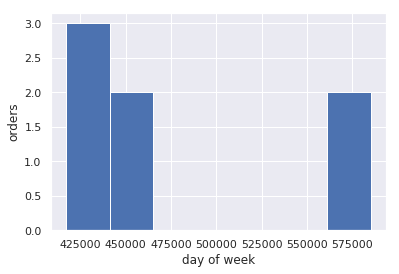

In [46]:
order_by_day = df[df['add_to_cart_order']==1].groupby('order_dow')['eval_set'].count()
plt.hist(order_by_day, bins=7)
plt.xlabel('day of week')
plt.ylabel('orders')
plt.show()

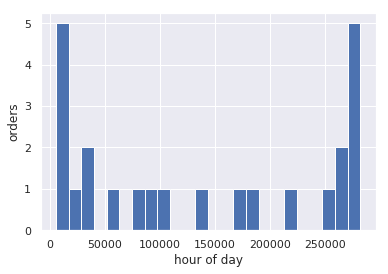

order_hour_of_day
0      22224
1      12103
2       7375
3       5343
4       5392
5       9374
6      29913
7      90032
8     174663
9     252529
10    282470
11    278614
12    266827
13    271884
14    276658
15    277207
16    266443
17    223433
18    178554
19    137340
20    102087
21     76486
22     59982
23     39139
Name: eval_set, dtype: int64

In [49]:
order_by_hour = df[df['add_to_cart_order']==1].groupby('order_hour_of_day')['eval_set'].count()
plt.hist(order_by_hour, bins=24)
plt.xlabel('hour of day')
plt.ylabel('orders')
plt.show()
order_by_hour
#order_by_hour.sum()